4422102/4422102 [==============================] - 0s 0us/step
Image Label : 9
(60000, 28, 28)
(10000, 28, 28)
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.9410 - accuracy: 0.6748
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7020 - accuracy: 0.7193
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6088 - accuracy: 0.7750
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5564 - accuracy: 0.8008
Epoch 5/5
1/1 [==============================] - 0s 103ms/step
[[1.2169049e-09 2.2035836e-25 1.6491983e-19 6.5924032e-17 3.4576563e-14
  7.9911232e-02 5.7114635e-22 1.0800674e-01 1.1556784e-03 8.1092632e-01]
 [1.0753500e-03 1.8408370e-08 4.9382910e-01 8.1856077e-04 4.6817267e-01
  2.3663987e-18 3.6077507e-02 3.8163438e-27 2.6722370e-05 1.4861660e-36]
 [3.3006687e-17 1.0000000e+00 0.0000000e+00 2.2027244e-09 1.9551126e-16
  0.0000000e+00 1.6341743e-24 0.0000000e+00 0.0000000e+00 0

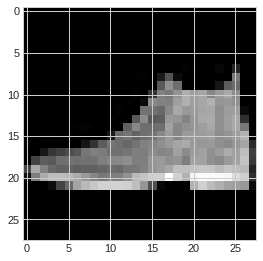

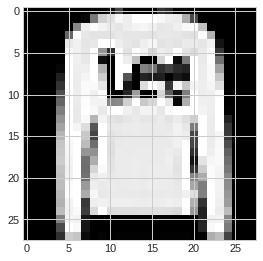

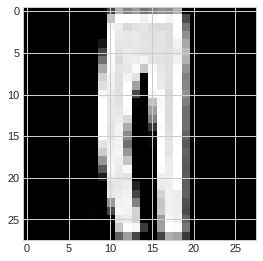

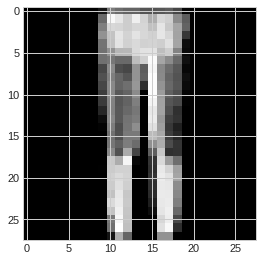

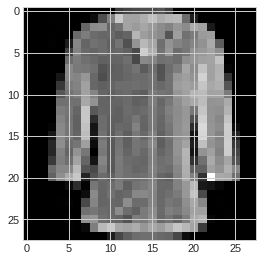

In [28]:
### Artificial Neural Networks ###

# Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load data set
fashion = keras.datasets.fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashion.load_data()

imgIndex = 0
img = trainImages[imgIndex]
print("Image Label :", trainLabels[imgIndex])
plt.imshow(img)

'''
output:
Image Label: 9
<matplotlib.image.AxesImage at 0x7f1111a06d68>
'''

# Print shape of training a testing data
print(trainImages.shape)
print(testImages.shape)

'''
output:
(60000, 28, 28)
(10000, 28, 28)
'''

# Create NN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile (optimizer = adam, loss= sparse, metrics= accuracy)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model (fit training data)
model.fit(trainImages, trainLabels, epochs=5, batch_size=32)

'''
output:
#Output
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 3.6150 - accuracy: 0.6802
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7296 - accuracy: 0.7488
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6374 - accuracy: 0.7725
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5873 - accuracy: 0.7906
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5579 - accuracy: 0.7993
<tensorflow.python.keras.callbacks.History at 0x7f1108dc3588>
'''

# Evaluate test data
model.evaluate(testImages, testLabels)

'''
output:
#Output
313/313 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.7981
[0.5915989279747009, 0.7980999946594238]
'''

# Make Prediction (test data)
prediction = model.predict(testImages[0:5])

# Print predicted labels
print(prediction)

'''
output:
[[1.74235439e-07 2.69071290e-08 6.66509115e-20 3.09463957e-07
  1.11526007e-20 1.34603798e-01 8.10060641e-08 7.74199590e-02
  3.87958280e-05 7.87936807e-01]
 [2.89689321e-02 1.06601091e-02 6.28736615e-01 2.77338717e-02
  1.61624148e-01 1.49910515e-02 8.56256112e-02 1.23378839e-02
  2.35275514e-02 5.79410419e-03]
 [6.75366528e-06 9.99993205e-01 4.27281517e-12 2.68350314e-10
  8.65088672e-16 1.05001736e-14 1.33745196e-12 0.00000000e+00
  1.84386378e-11 0.00000000e+00]
 [6.56618613e-06 9.99993443e-01 1.46741508e-11 1.80866895e-08
  7.95811239e-14 1.56570215e-16 5.96713607e-12 0.00000000e+00
  3.94146077e-10 0.00000000e+00]
 [2.19924763e-01 1.00887669e-02 1.99720263e-01 6.23517819e-02
  4.97664846e-02 3.40277069e-07 4.30076748e-01 7.25772731e-09
  2.80708820e-02 2.27675168e-09]]
'''

# Print maximum label values
print(np.argmax(prediction, axis=1))
# Print actual label values
print(testLabels[0:5])

'''
output:
[9 2 1 1 6]
[9 2 1 1 6]
'''

# Print first 5 images
for i in range(0, 5):
    plt.imshow(testImages[i], cmap='gray')
    plt.show()